# **Advanced Machine Learning**

Yurag, Marivient Alexia R.

BSCS - IS - 3B

March 27, 2024

Assessment 6

**Assessment Task: Predicting Feedback on Online Food Orders Using Logistic Regression**

**1. Import Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Part 1: Data Loading and Preprocessing**

In [ ]:
#Load the Dataset

df = pd.read_csv('onlinefoods.csv')
#statistics = df.describe()
df.head()
#print(statistics)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [ ]:
#Select Features and Target Variable
features = ['Gender', 'Marital Status', 'Age', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Family size']
target = ['Feedback']

In [ ]:
# Separating X and y
X = df[features]
y = df[target]

# Handling missing values and encoding categorical variables
numeric_features = ['Age', 'Family size']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Gender', 'Marital Status', 'Educational Qualifications', 'Monthly Income']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


**Part 2: Exploratory Data Analysis (EDA)**

In [ ]:
#Descriptive Statistics
statistics_summary = df.describe()
print(statistics_summary)

              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000


In [ ]:
#Visualizations

# Visualization 1: Distribution of Age and its impact on Feedback
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Output', bins=20, kde=True)
plt.title('Distribution of Age and its Impact on Feedback')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Feedback')
plt.show()

# Visualization 2: Proportions of Feedback across different levels of Monthly Income
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Monthly Income', y='Output', estimator=lambda x: len(x) / len(df) * 100)
plt.title('Proportions of Feedback across Different Levels of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Proportion of Feedback (%)')
plt.xticks(rotation=45)
plt.show()

# Visualization 3: Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Part 3: Logistic Regression Model**

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Creating the logistic regression pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Fitting the model
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Family size']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Marital Status',
                                                   'Educational Qualifications',
                                                   'Monthly Income'])])),
                ('classifier', LogisticRegression())])

In [ ]:
# Predictions
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{conf_matrix}')
print(f'Classification Report: \n{class_report}')

**Part 4: Data Analysis and Visualization**

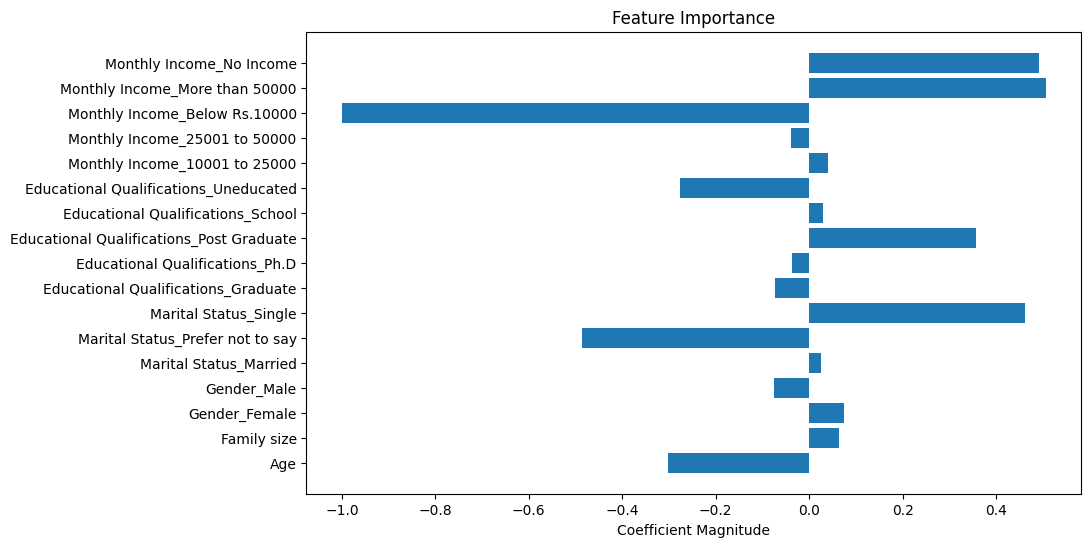

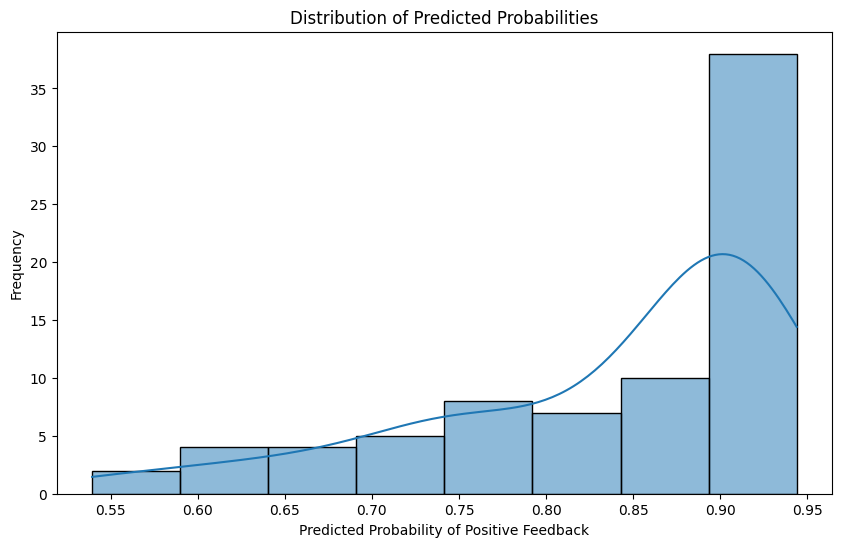

In [ ]:
#Feature Importance

# Get feature names after one-hot encoding
feature_names = np.array(preprocessor.named_transformers_['cat']
                         .named_steps['onehot']
                         .get_feature_names_out(categorical_features))

# Combine numerical and categorical feature names
all_feature_names = np.concatenate([numeric_features, feature_names])

# Get coefficients from the logistic regression model
coefficients = clf.named_steps['classifier'].coef_[0]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(all_feature_names, coefficients)
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importance')
plt.show()

#Prediction Insights:
# Predict probabilities
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Plot distribution of predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba, kde=True)
plt.xlabel('Predicted Probability of Positive Feedback')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()